In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler


In [22]:
os.getcwd()

'c:\\Users\\ardra\\Desktop\\Data-science\\Data_science_study\\Data-science-study\\Project\\Healthcare_Domain\\Parkinson_Disease'

In [23]:
df = pd.read_csv('parkinsons.data')
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [24]:
pd.pandas.set_option('display.max_columns', None)
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [25]:
# Find null values in the datasets
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [26]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [28]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [29]:
# Finding the uniques value from the dataset

for i in df.columns:
    print("********************************************",i,
         "*************************************************")
    print()
    print(set(df[i].tolist()))
    print()

******************************************** name *************************************************

{'phon_R01_S26_3', 'phon_R01_S16_4', 'phon_R01_S13_6', 'phon_R01_S33_4', 'phon_R01_S17_2', 'phon_R01_S06_5', 'phon_R01_S10_6', 'phon_R01_S20_1', 'phon_R01_S02_5', 'phon_R01_S31_1', 'phon_R01_S34_5', 'phon_R01_S33_3', 'phon_R01_S34_4', 'phon_R01_S50_4', 'phon_R01_S37_3', 'phon_R01_S19_3', 'phon_R01_S32_6', 'phon_R01_S16_5', 'phon_R01_S21_6', 'phon_R01_S01_1', 'phon_R01_S21_2', 'phon_R01_S49_3', 'phon_R01_S39_1', 'phon_R01_S39_5', 'phon_R01_S13_3', 'phon_R01_S31_4', 'phon_R01_S18_1', 'phon_R01_S22_4', 'phon_R01_S16_6', 'phon_R01_S34_6', 'phon_R01_S33_1', 'phon_R01_S26_2', 'phon_R01_S43_2', 'phon_R01_S07_1', 'phon_R01_S20_2', 'phon_R01_S43_1', 'phon_R01_S01_3', 'phon_R01_S17_1', 'phon_R01_S24_6', 'phon_R01_S43_5', 'phon_R01_S08_5', 'phon_R01_S07_2', 'phon_R01_S18_3', 'phon_R01_S49_4', 'phon_R01_S13_2', 'phon_R01_S25_5', 'phon_R01_S01_6', 'phon_R01_S02_6', 'phon_R01_S21_3', 'phon_R01_S24_3'

AxesSubplot(0.125,0.11;0.775x0.77)


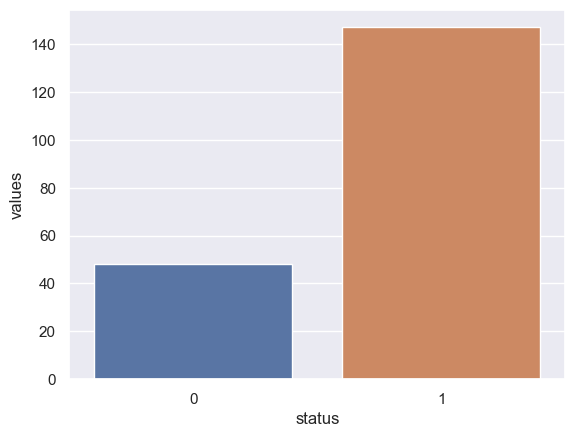

In [30]:
temp= df['status'].value_counts()
temp_df= pd.DataFrame({'status': temp.index, 'values':temp.values})
print(sns.barplot(x='status', y='values', data= temp_df))

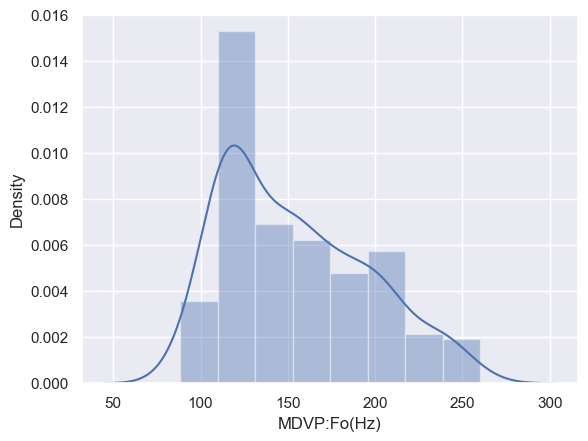

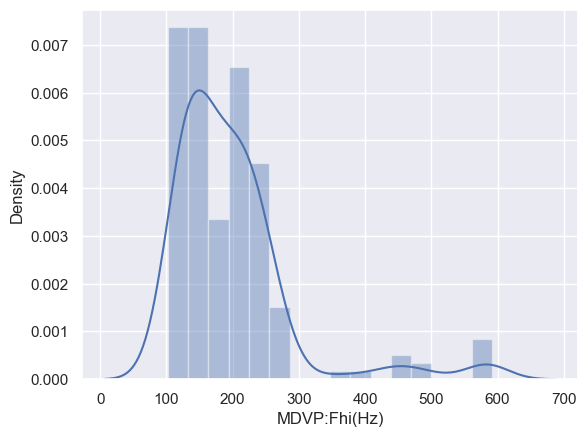

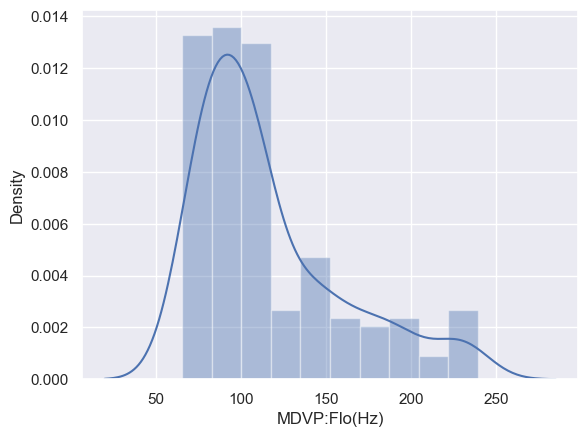

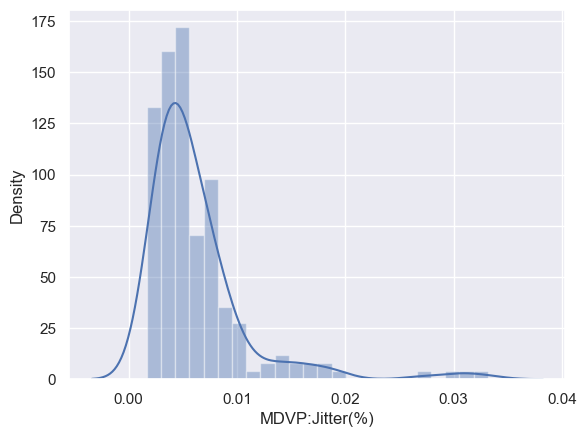

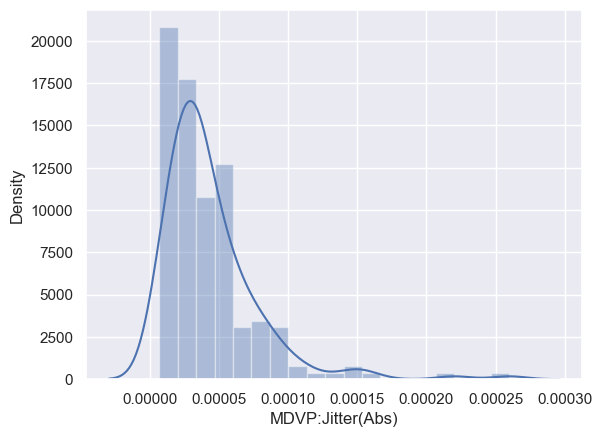

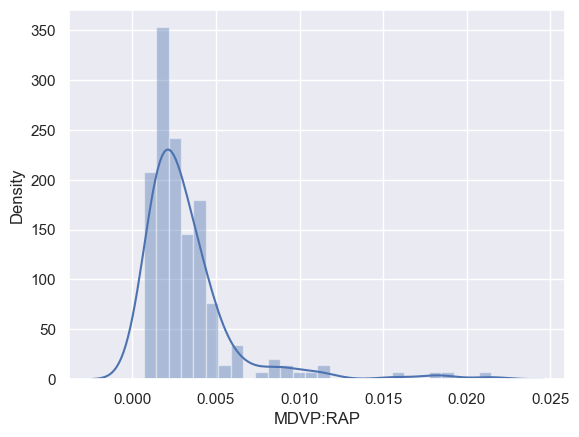

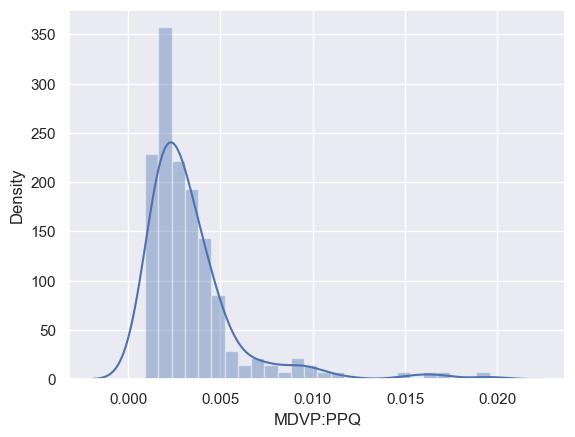

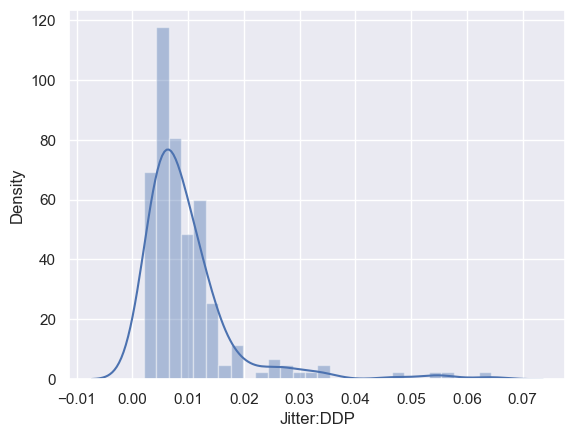

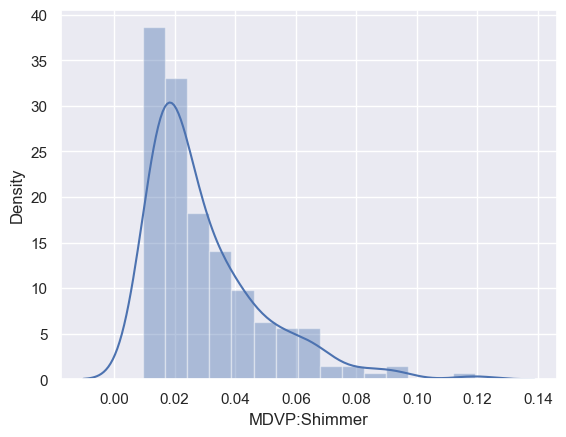

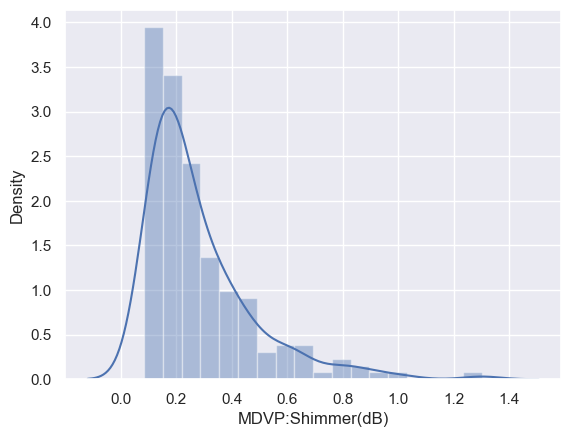

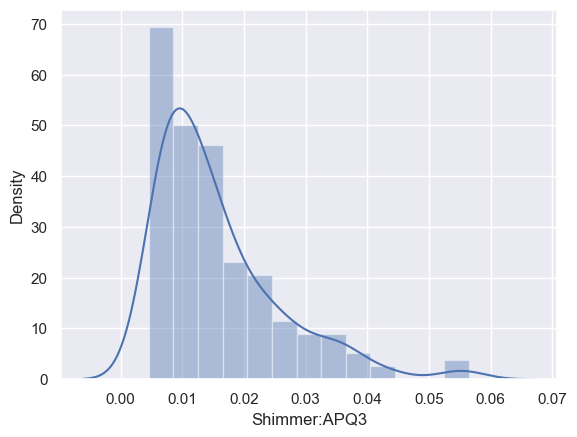

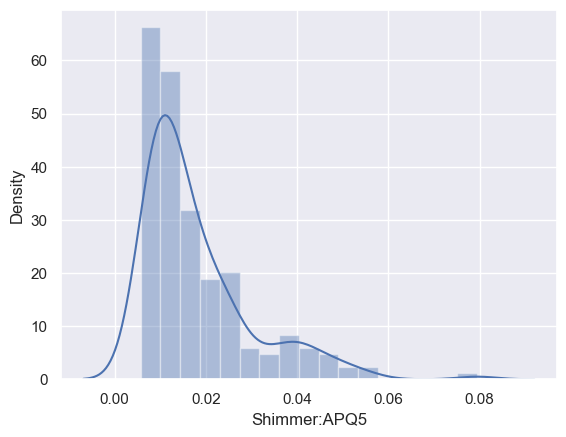

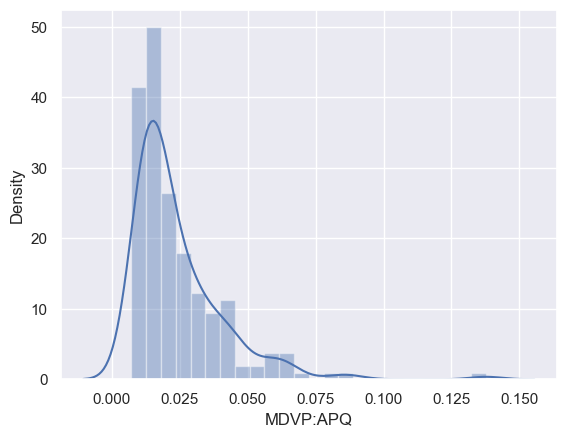

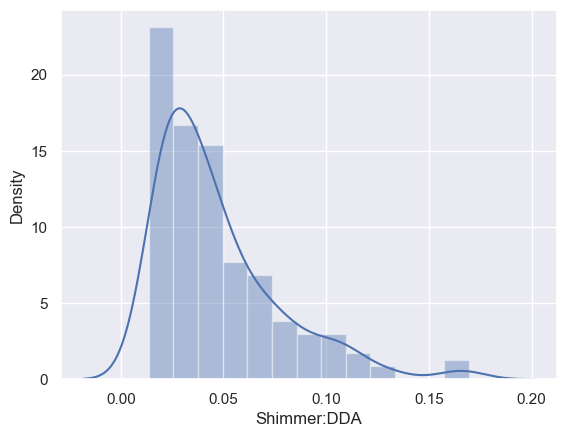

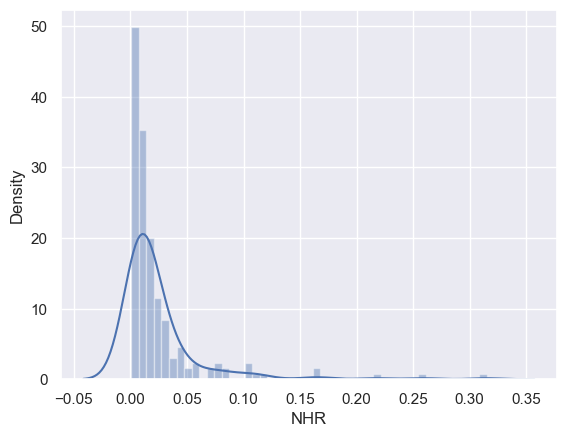

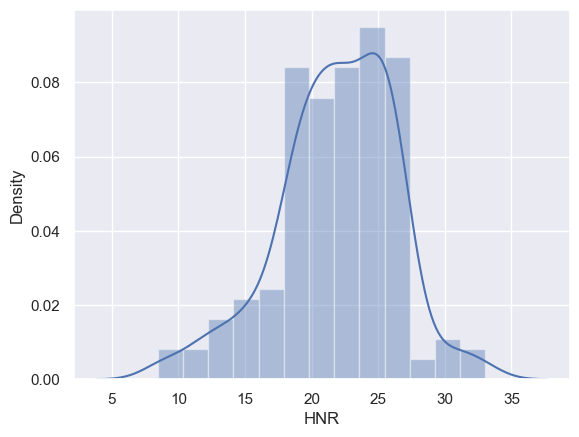

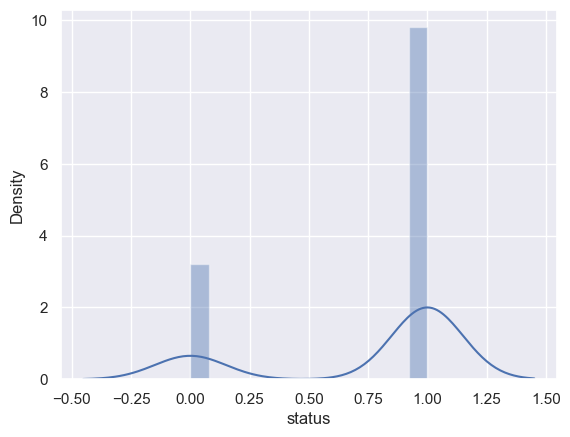

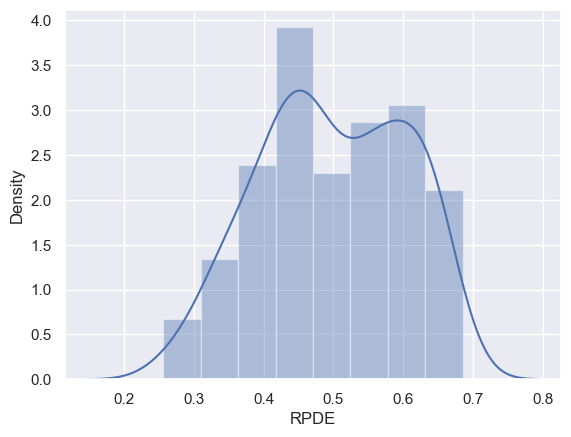

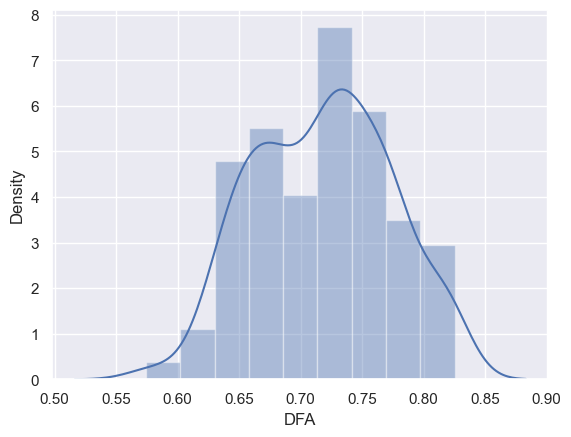

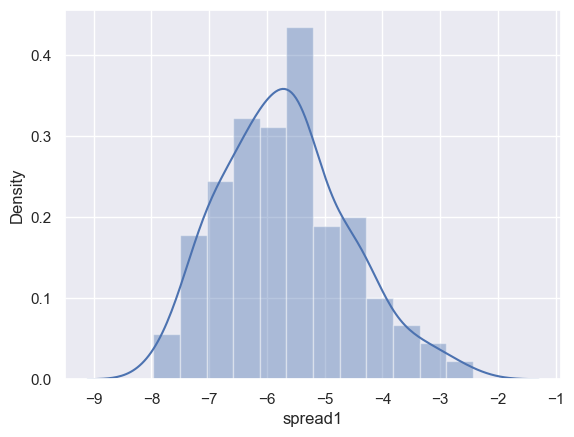

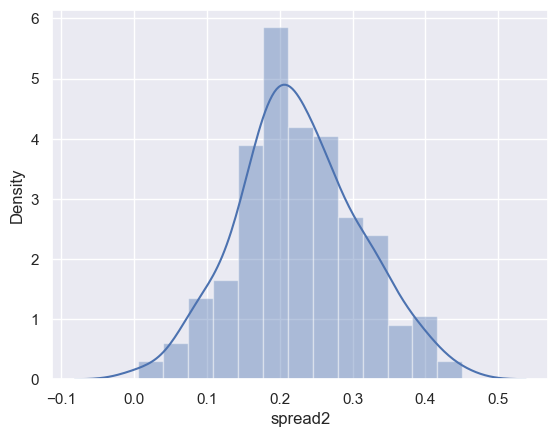

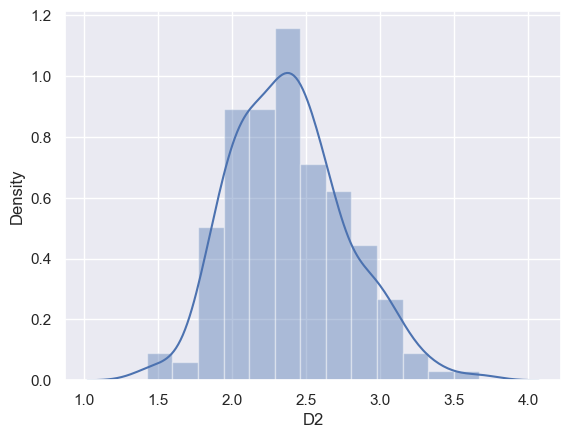

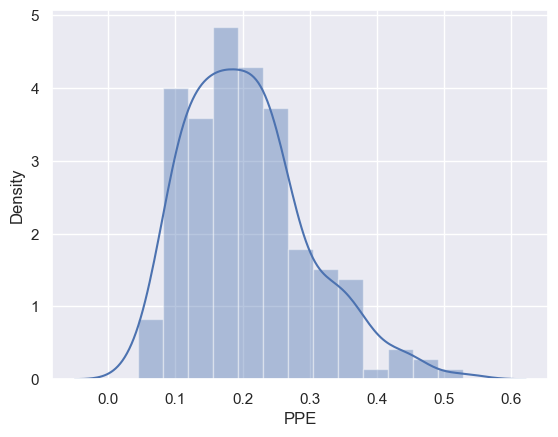

In [31]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

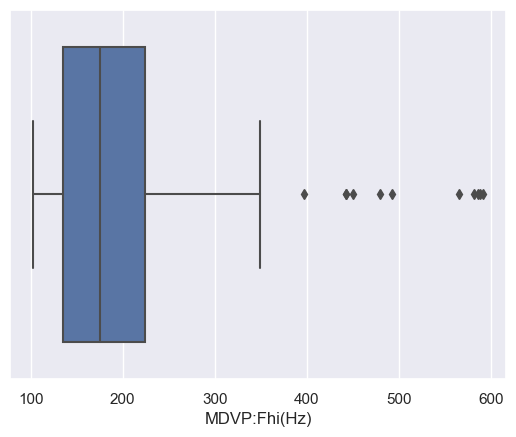

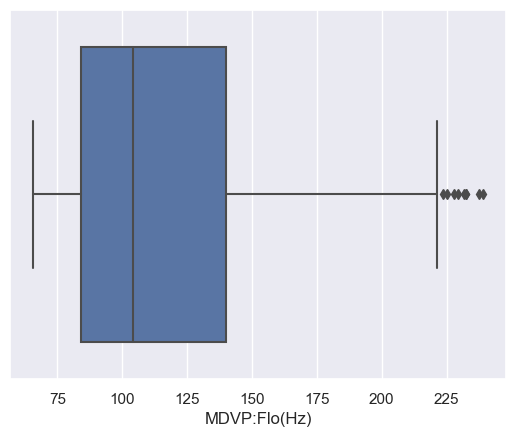

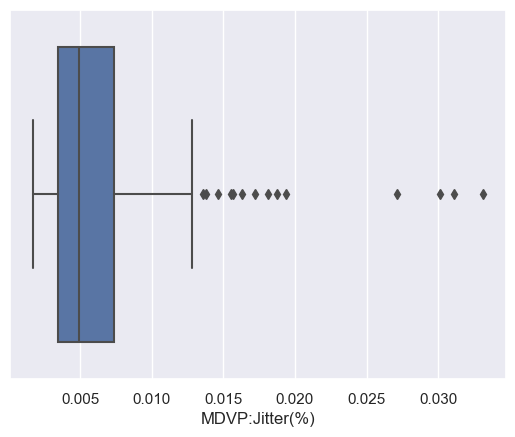

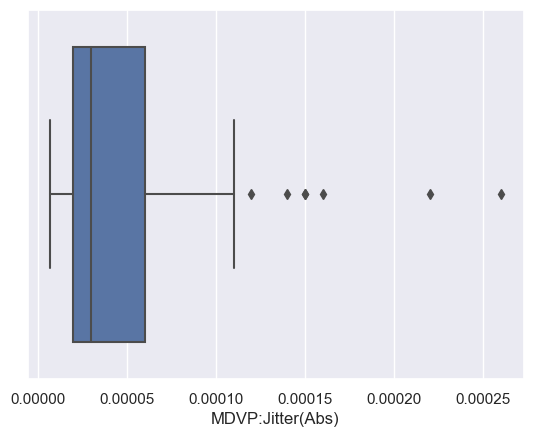

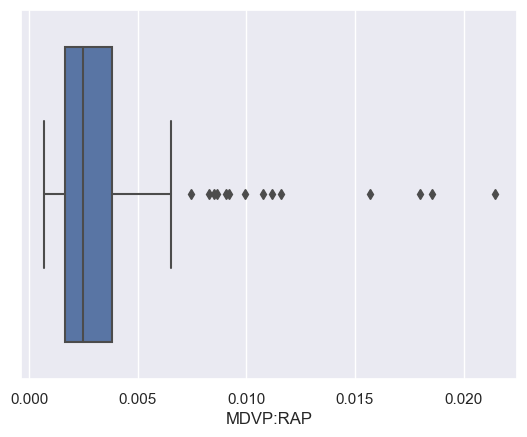

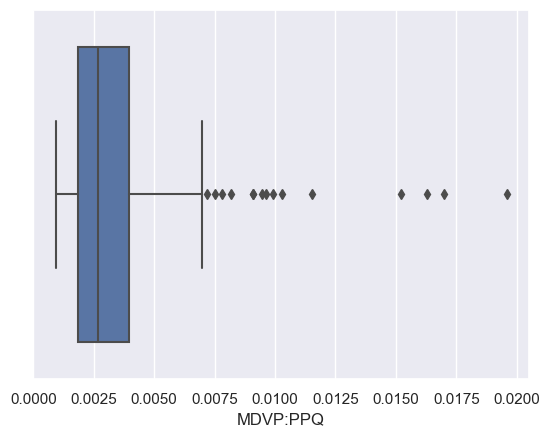

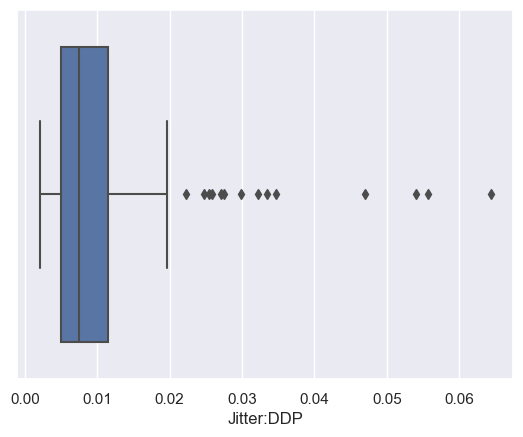

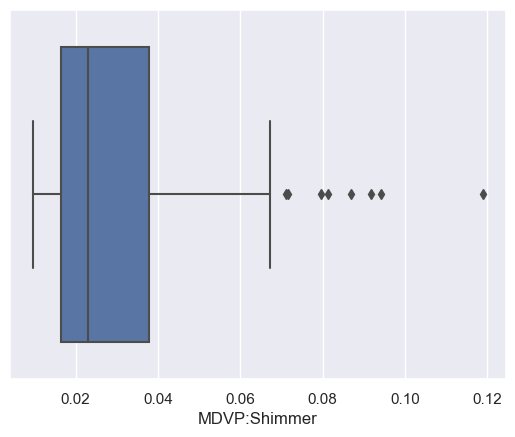

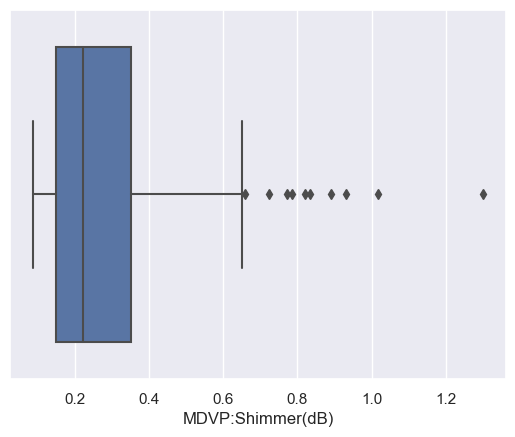

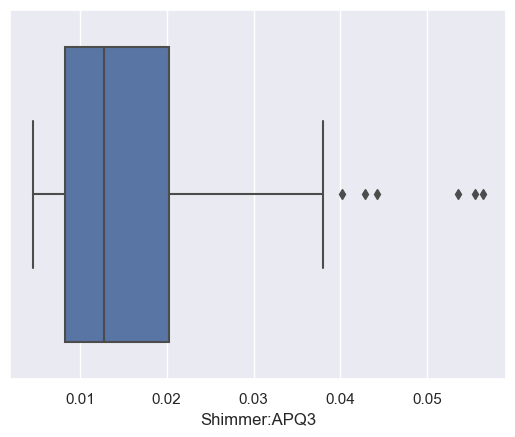

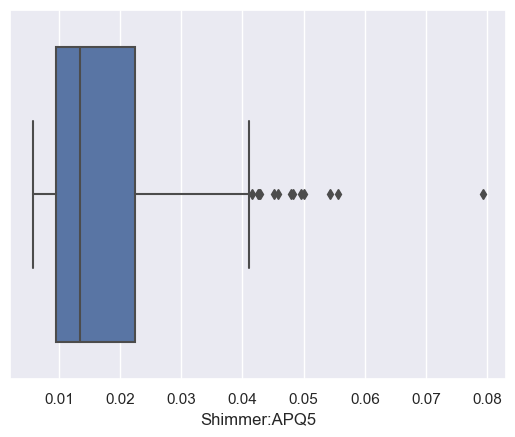

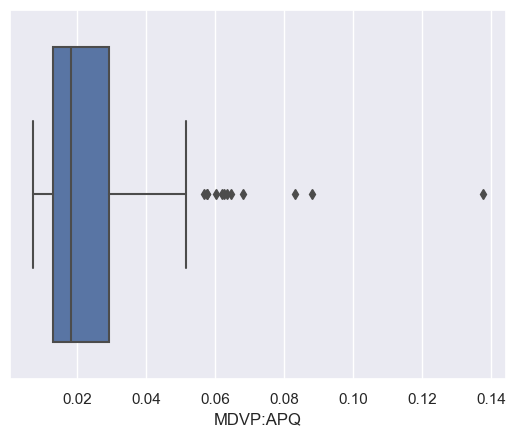

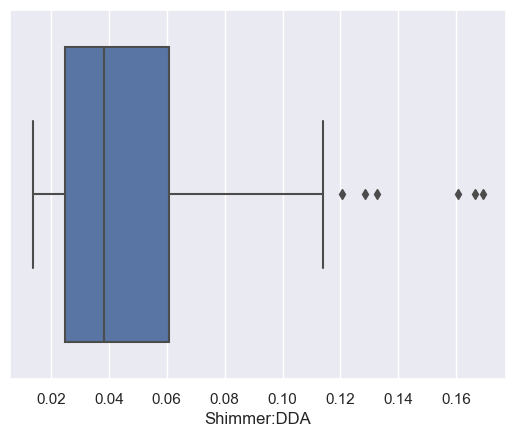

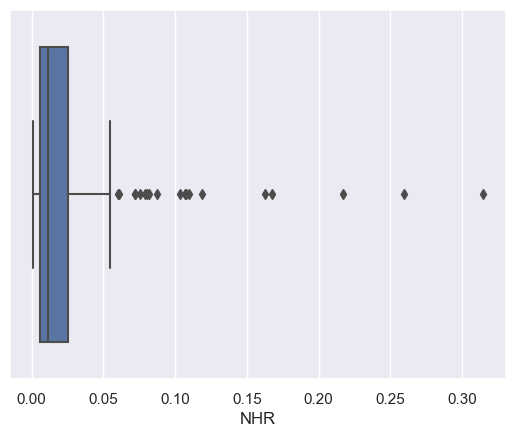

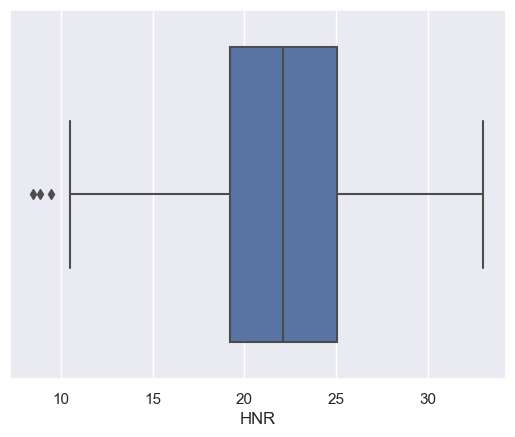

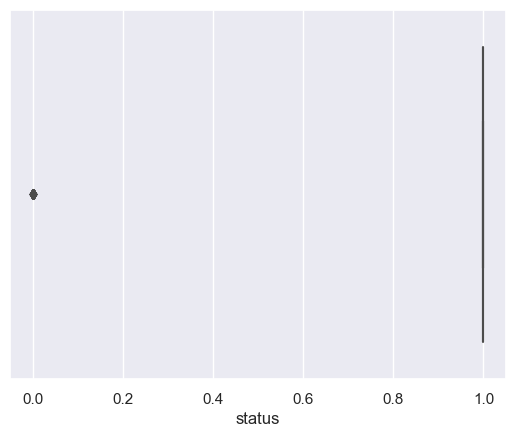

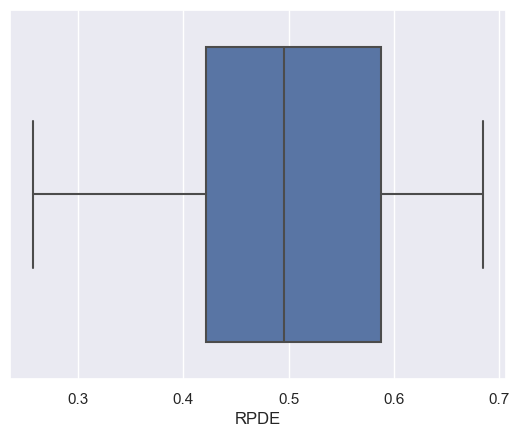

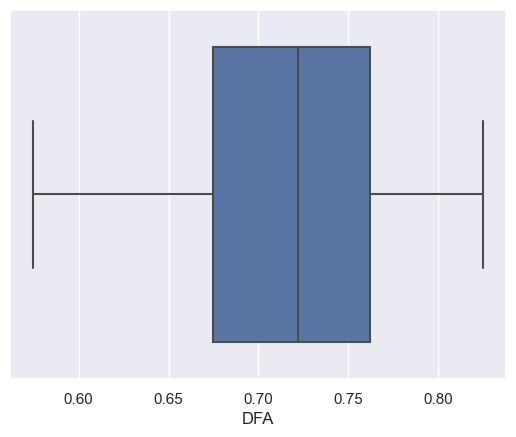

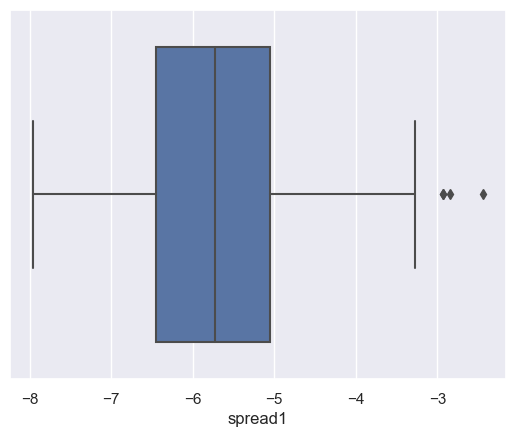

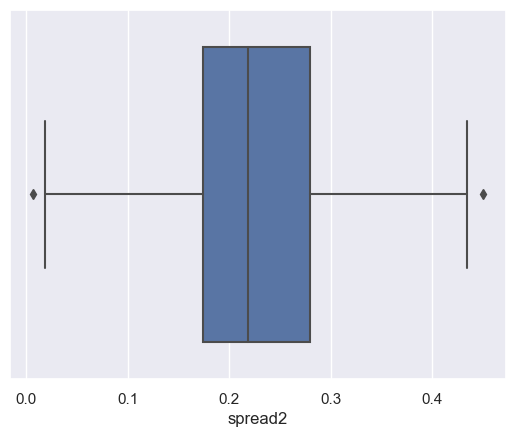

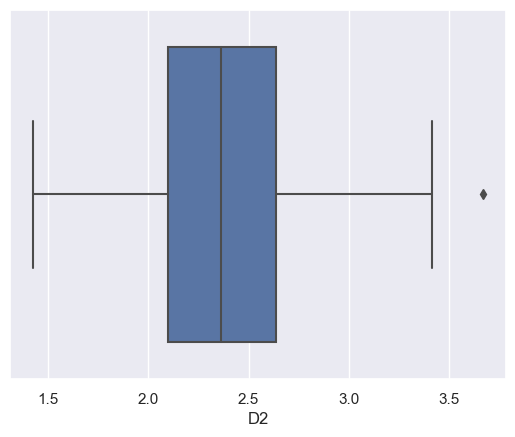

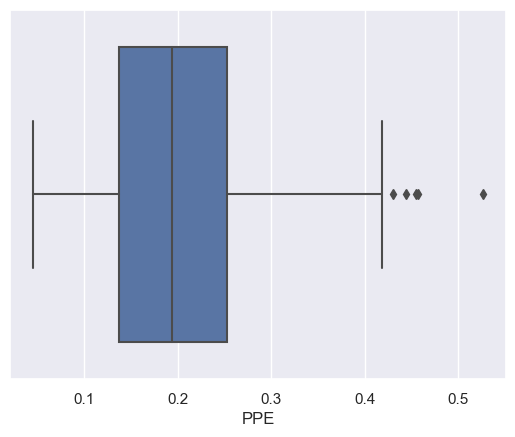

In [32]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude= ['object']))[1:]:
    boxplot(i)

In [33]:
# Advance EDA - dtale
import dtale
import dtale.app as dtale_app

In [34]:
dtale.show(df)

In [ ]:
!pip install pandas-profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
     -------------------------------------- 357.6/357.6 kB 4.5 MB/s eta 0:00:00
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached numba-0.58.1-cp39-cp39-win_amd64.whl (2.6 MB)
     ------------------------------------- 381.9/381.9 kB 12.0 MB/s eta 0:00:00
  Using cached phik-0.12.3-cp39-cp39-win_amd64.whl (663 kB)
  Using cached typeguard-4.1.5-py3-none-any.whl (34 kB)
  Using cached llvmlite-0.41.1-cp39-cp39-win_amd64.whl (28.1 MB)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
     ---------------------------------------- 1.9/1.9 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.14.1
    Uninstalling pydantic_core-2.14.1:
      Successfully uninstalled pydantic_core-2.14.1
  Attempting uninstall: llvmlite
    

ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
# pandas profiling
from pandas_profiling import ProfileReport
prof= ProfileReport(df)
prof.to_file(output_file= 'output.html')

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
df.duplicated().sum()

0

In [ ]:
!pip uninstall llvmlite

Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
!pip uninstall --record files.txt llvmlite


Usage:   
  pip uninstall [options] <package> ...
  pip uninstall [options] -r <requirements file> ...

no such option: --record


In [ ]:
! pip uninstall llvmlite

Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
